# Homework 2.2 | Data Transformations

*Homework is designed to both test your knowlege and challenge you to apply familiar concepts to new applications. Answer clearly and completely. You are welcomed and encouraged to work in groups so long as your work is your own. Submit your figures and answers to [Gradescope](https://www.gradescope.com).*

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# File Path
file_path = 'https://tayweid.github.io/econ-0150/parts/part-2-2/data/'

## Q1. Transforming Marriage Rates

The following questions are based on **crude marriage rates** in `marriage_rates.csv` — numbers of marriages per one thousand inhabitants — in 1990 and 2019. Each row represents a different European country.

In [10]:
# Load Data
marriage = pd.read_csv(file_path + 'marriage_rates.csv')
marriage.head()

,GEO (Labels),1990,2019
0,Belgium,6.5,3.9
1,Bulgaria,6.9,4.2
2,Czechia,8.8,5.1
3,Denmark,6.1,5.3
4,Germany,6.6,5.0


a) Create a new column of absolute change in marriage rates from 1990 to 2019. Compute the **absolute change** in the marraige rate by subtracting the old value from the new value. Which country in this dataset has the largest absolute change between these years? (*Hint: do not take an absolute value; treat 1 as larger than -2.*)

In [13]:
marriage['absolute_change'] = marriage['2019'] - marriage['1990']
max = marriage['absolute_change'].max()
marriage[marriage['absolute_change'] == max]

,GEO (Labels),1990,2019,absolute_change
26,Iceland,4.5,5.8,1.3


b) Create a new column of relative change in marriage rates from 1990 to 2019. Compute the **relative change** as the ratio resulting from dividing the absolute change by the old value. Which country in this dataset has the largest relative change between these years?

In [14]:
marriage['relative_change'] = marriage['absolute_change']/marriage['1990']
max = marriage['relative_change'].max()
marriage[marriage['relative_change'] == max]

,GEO (Labels),1990,2019,absolute_change,relative_change
26,Iceland,4.5,5.8,1.3,0.288889


## Q2. Growth Rate of Coffee Prices

The dataset `Monthly_Coffee_Prices_Lag.csv` contains data on the mean price of coffee beans each month since 1973. The column `current_price` contains the mean coffee price in the month recorded in the column `date`. The column `previous_price` contains the mean coffee price in the month prior to the date recorded in the column `date`.

In [6]:
# Load Data
prices = pd.read_csv(file_path + 'Monthly_Coffee_Prices_Lag.csv', index_col=0)
prices['date'] = pd.to_datetime(prices['date'])
prices.head()

,date,current_price,previous_price
1,1973-09-01,0.652700,0.654840
2,1973-10-01,0.659552,0.652700
3,1973-11-01,0.646810,0.659552
4,1973-12-01,0.670937,0.646810
5,1974-01-01,0.716991,0.670937


a) Use these two price columns to calculate the monthly **growth rate** of the price of coffee in a new column `growth_rate`.  No need to submit anything for this question. The equation for a growth rate $g$ is given by:

$$g = \frac{p_2 - p_1}{p1}$$

In [7]:
prices['growth_rate'] = (prices['current_price'] - prices['previous_price'])/prices['current_price']

b) Use a linegraph and your new `growth_rate` column to plot the growth rate of coffee prices since 1973. What trend do you notice about the growth rate of coffee prices?

<Axes: xlabel='date', ylabel='growth_rate'>

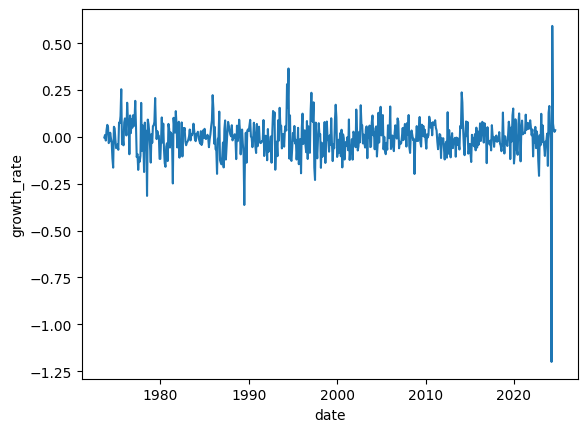

In [8]:
sns.lineplot(prices, y='growth_rate', x='date')

c) Use a histogram and your new `growth_rate` column to plot the distribution of the growth rate of coffee prices since 1973. Describe the distribution of the growth rate of coffee prices?

<Axes: xlabel='growth_rate', ylabel='Count'>

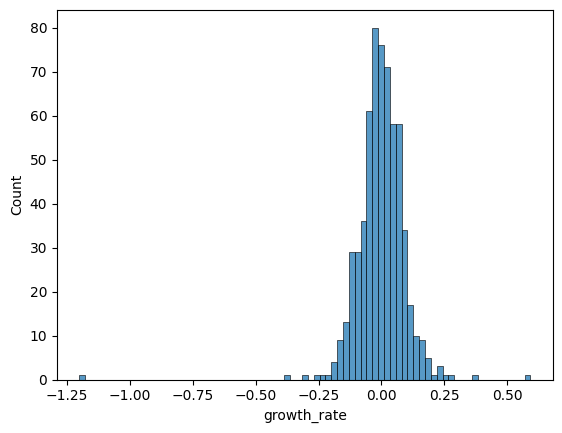

In [9]:
sns.histplot(prices, x='growth_rate')